In [ ]:
#### Primera parte
#### Operaciones con atributos 
## En esta seccion se realizan operaciones basicas como el cargue de datos, filtrar atributos especificos, revisar estadisticas, realizar joins entre tablas, identificar relaciones entre los datos, realizar clasificaciones, agrupaciones y limpieza que nos permmitiera obtener la base inicial para aplicar el proyecto del curso.
#Llamar datos usamos la libreria pandas
import pandas as pd

#Cargar datos 
# Leer la hoja principal (por defecto, la primera hoja)
perfil = pd.read_excel("D:/DATOX/Agrarias/Pedo/bd_cesar.xlsx")
# Información básica sobre el DataFrame 'perfil'
print(perfil.info())


# Leer la hoja "Horizontes"
labs = pd.read_excel("D:/DATOX/Agrarias/Pedo/bd_cesar.xlsx", sheet_name="Horizontes")
# Información básica sobre el DataFrame 'labs'
print(labs.info())


# Leer otro archivo de Excel
coor = pd.read_excel("D:/DATOX/Agrarias/Pedo/bd_perfiles_ubicacion.xlsx")
# Información básica sobre el DataFrame 'coor'
print(coor.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              1017 non-null   int64  
 1   COD_PERFIL                              1017 non-null   object 
 2   COD_DEPTO                               1017 non-null   int64  
 3   CLIMA_AMBIENTAL                         1017 non-null   object 
 4   PORC_PENDIENTE                          1017 non-null   object 
 5   DISTRIBUCION_LLUVIAS                    1017 non-null   object 
 6   REGIMEN_HUMEDAD                         1017 non-null   object 
 7   GRADO_EROSION                           1017 non-null   object 
 8   FRECUENCIA_MOVIMIENTO_MASA              1017 non-null   object 
 9   DRENAJE_NATURAL                         1017 non-null   object 
 10  PROFUNDIDAD_EFECTIVA                    1017 non-null   obje

In [ ]:
data_soil = pd.merge(coor, perfil, on="COD_PERFIL", how="outer")  # Relación 1:1
data_soil = pd.merge(labs, data_soil, on="COD_PERFIL", how="outer")  # Relación 1:n

# Filtrar las filas donde 'PROFUNDIDAD_INICIAL' es NaN
data_null = data_soil[data_soil['PROFUNDIDAD_INICIAL'].isna()]

# Mostrar la estructura del DataFrame
print(data_soil.info()) #.info() muestra la estructura de un objeto 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0_x                            3578 non-null   float64
 1   ESTUDIO                                 1496 non-null   object 
 2   COD_PERFIL                              3592 non-null   object 
 3   PROFUNDIDAD_INICIAL                     3578 non-null   float64
 4   PROFUNDIDAD_FINAL                       3578 non-null   float64
 5   pH                                      3493 non-null   object 
 6   CARBONO ORGANICO (CO%)                  2769 non-null   float64
 7   FÓSFORO DISPONIBLE                      131 non-null    object 
 8   CICA                                    3488 non-null   float64
 9   Ca                                      3491 non-null   float64
 10  Mg                                      3492 non-null   obje

In [ ]:
# Ordenar el DataFrame por 'COD_PERFIL', 'PROFUNDIDAD_INICIAL', y 'PROFUNDIDAD_FINAL'
data_soil = data_soil.sort_values(by=['COD_PERFIL', 'PROFUNDIDAD_INICIAL', 'PROFUNDIDAD_FINAL']) #sort_values ordena DF

# Número de perfiles únicos en 'data_soil'
num_perfiles_data_soil = data_soil['COD_PERFIL'].nunique()

# Número de perfiles únicos en 'labs'
num_perfiles_labs = labs['COD_PERFIL'].nunique()

print(f"Número de perfiles en data_soil: {num_perfiles_data_soil}")
print(f"Número de perfiles en labs: {num_perfiles_labs}")

Número de perfiles en data_soil: 1032
Número de perfiles en labs: 1018


In [ ]:
# Resumen estadístico del DataFrame 
print(data_soil.describe(include='all'))  # Incluye estadísticas para todas las columnas

# Estructura del DataFrame 
print(data_soil.info())

        Unnamed: 0_x                     ESTUDIO COD_PERFIL  \
count    3578.000000                        1496       3592   
unique           NaN                          24       1032   
top              NaN  Cesar_25K_Correlación 2017         11   
freq             NaN                         338          8   
mean     1789.342370                         NaN        NaN   
std      1033.868711                         NaN        NaN   
min         0.000000                         NaN        NaN   
25%       894.250000                         NaN        NaN   
50%      1788.500000                         NaN        NaN   
75%      2684.750000                         NaN        NaN   
max      3579.000000                         NaN        NaN   

        PROFUNDIDAD_INICIAL  PROFUNDIDAD_FINAL      pH  \
count            3578.00000        3578.000000  3493.0   
unique                  NaN                NaN   382.0   
top                     NaN                NaN     6.5   
freq       

In [ ]:
# Seleccionar columnas  2 a 52 
data_soil = data_soil.iloc[:, 2:53]
# Estructura del DataFrame #verificar cuales son numericas
print(data_soil.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   COD_PERFIL                              3592 non-null   object 
 1   PROFUNDIDAD_INICIAL                     3578 non-null   float64
 2   PROFUNDIDAD_FINAL                       3578 non-null   float64
 3   pH                                      3493 non-null   object 
 4   CARBONO ORGANICO (CO%)                  2769 non-null   float64
 5   FÓSFORO DISPONIBLE                      131 non-null    object 
 6   CICA                                    3488 non-null   float64
 7   Ca                                      3491 non-null   float64
 8   Mg                                      3492 non-null   object 
 9   K                                       3492 non-null   float64
 10  B_T                                     3442 non-null   floa

In [ ]:
def obtener_columnas_chr(data_frame):
  
    # Identificar columnas de tipo 'object' (texto o carácter)
    columnas_chr = [col for col in data_frame.columns if data_frame[col].dtypes == 'object']
    
    return columnas_chr

#identificar columnas object en la columna tipo de dato
columnas_chr = obtener_columnas_chr(data_soil)
print(columnas_chr)

['COD_PERFIL', 'pH', 'FÓSFORO DISPONIBLE', 'Mg', 'ACIDEZ INTERCAMBIABLE cmol(+)/Kg', 'SALINIDAD_CLASE', 'ClASE_TEXTURAL', 'NOMENCLATURA', 'TEXTURA', 'MODIFICADOR_TEXTURA', 'CLIMA_AMBIENTAL_x', 'ID', 'CLIMA_AMBIENTAL_y', 'PORC_PENDIENTE', 'DISTRIBUCION_LLUVIAS', 'REGIMEN_HUMEDAD', 'GRADO_EROSION', 'FRECUENCIA_MOVIMIENTO_MASA', 'DRENAJE_NATURAL', 'PROFUNDIDAD_EFECTIVA', 'PORC_PEDREGOSIDAD_SUPERFICIAL_CUBIERTA', 'CLASE_PEDREGOSIDAD', 'PORC_AFLORAMIENTO_SUPERFICIE_CUBIERTA', 'CLASE_AFLORAMIENTO', 'FASE_INUNDACION_ENCHARCAMIENTO', 'FRECUENCIA_INUNDACION', 'DURACION_INUNDACION']


In [ ]:
# Convertir columnas específicas a tipo numérico
columnas_a_convertir = ['FÓSFORO DISPONIBLE', 'ACIDEZ INTERCAMBIABLE cmol(+)/Kg', 'pH', 'Mg']
data_soil[columnas_a_convertir] = data_soil[columnas_a_convertir].apply(pd.to_numeric, errors='coerce')

# Ver la estructura 
print(data_soil.info())

# Resumen estadístico 
print(data_soil.describe(include='all'))

# Función para obtener las columnas de tipo carácter
def obtener_columnas_chr(data_frame):
  
    columnas_chr = [col for col in data_frame.columns if data_frame[col].dtypes == 'object']
    return columnas_chr

# Mostrar las columnas de tipo carácter
print(obtener_columnas_chr(data_soil))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   COD_PERFIL                              3592 non-null   object 
 1   PROFUNDIDAD_INICIAL                     3578 non-null   float64
 2   PROFUNDIDAD_FINAL                       3578 non-null   float64
 3   pH                                      3490 non-null   float64
 4   CARBONO ORGANICO (CO%)                  2769 non-null   float64
 5   FÓSFORO DISPONIBLE                      130 non-null    float64
 6   CICA                                    3488 non-null   float64
 7   Ca                                      3491 non-null   float64
 8   Mg                                      3490 non-null   float64
 9   K                                       3492 non-null   float64
 10  B_T                                     3442 non-null   floa

In [ ]:
# Borrar columnas con todos los valores no necesarios 
data_soil = data_soil.dropna(axis=1, how='all')

# Borrar filas con valores vacíos en las columnas específicas
data_soil = data_soil.dropna(subset=['COD_PERFIL'])
data_soil = data_soil.dropna(subset=['PROFUNDIDAD_INICIAL'])
data_soil = data_soil.dropna(subset=['PROFUNDIDAD_FINAL'])
# data_soil = data_soil.dropna(subset=['pH'])  # Descomenta si es necesario
data_soil

,COD_PERFIL,PROFUNDIDAD_INICIAL,PROFUNDIDAD_FINAL,pH,CARBONO ORGANICO (CO%),FÓSFORO DISPONIBLE,CICA,Ca,Mg,K,...,FRECUENCIA_MOVIMIENTO_MASA,DRENAJE_NATURAL,PROFUNDIDAD_EFECTIVA,PORC_PEDREGOSIDAD_SUPERFICIAL_CUBIERTA,CLASE_PEDREGOSIDAD,PORC_AFLORAMIENTO_SUPERFICIE_CUBIERTA,CLASE_AFLORAMIENTO,FASE_INUNDACION_ENCHARCAMIENTO,FRECUENCIA_INUNDACION,DURACION_INUNDACION
0,101-A,0.0,25.0,5.1,6.41,32.0,21.8,7.5,3.2,0.3,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
1,11,0.0,4.0,6.5,2.50,51.0,20.4,53.0,24.5,0.8,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
2,11,4.0,25.0,5.9,0.83,50.0,20.0,18.2,8.1,0.4,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
3,11,25.0,52.0,5.8,0.58,48.0,23.3,19.4,7.7,0.4,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
4,11,52.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,T-043,107.0,150.0,5.1,0.21,18.0,47.1,18.5,12.5,0.8,...,No hay,Imperfecto,Moderadamente superficial (50cm - 75cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
3588,T-316,0.0,30.0,8.4,0.68,NaN,13.0,12.4,7.1,0.6,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
3589,T-316,30.0,52.0,8.5,0.11,NaN,11.5,7.3,4.7,0.2,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
3590,T-316,52.0,93.0,8.7,0.16,NaN,15.6,13.3,5.9,0.1,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay


In [ ]:
# Lista de perfiles que están fuera de la zona
list_eras = ["A-438", "A-187", "A-192", "PC-017A", "PC-018A", "PS-007"]

# Filtrar filas eliminando las que tienen 'COD_PERFIL' en la lista 'list_eras'
data_soil = data_soil[~data_soil['COD_PERFIL'].isin(list_eras)]
data_soil

,COD_PERFIL,PROFUNDIDAD_INICIAL,PROFUNDIDAD_FINAL,pH,CARBONO ORGANICO (CO%),FÓSFORO DISPONIBLE,CICA,Ca,Mg,K,...,FRECUENCIA_MOVIMIENTO_MASA,DRENAJE_NATURAL,PROFUNDIDAD_EFECTIVA,PORC_PEDREGOSIDAD_SUPERFICIAL_CUBIERTA,CLASE_PEDREGOSIDAD,PORC_AFLORAMIENTO_SUPERFICIE_CUBIERTA,CLASE_AFLORAMIENTO,FASE_INUNDACION_ENCHARCAMIENTO,FRECUENCIA_INUNDACION,DURACION_INUNDACION
0,101-A,0.0,25.0,5.1,6.41,32.0,21.8,7.5,3.2,0.3,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
1,11,0.0,4.0,6.5,2.50,51.0,20.4,53.0,24.5,0.8,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
2,11,4.0,25.0,5.9,0.83,50.0,20.0,18.2,8.1,0.4,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
3,11,25.0,52.0,5.8,0.58,48.0,23.3,19.4,7.7,0.4,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
4,11,52.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,T-043,107.0,150.0,5.1,0.21,18.0,47.1,18.5,12.5,0.8,...,No hay,Imperfecto,Moderadamente superficial (50cm - 75cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
3588,T-316,0.0,30.0,8.4,0.68,NaN,13.0,12.4,7.1,0.6,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
3589,T-316,30.0,52.0,8.5,0.11,NaN,11.5,7.3,4.7,0.2,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
3590,T-316,52.0,93.0,8.7,0.16,NaN,15.6,13.3,5.9,0.1,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay


In [ ]:
# Asignar el DataFrame original
df = data_soil.copy()

# Identificar los perfiles con 'PROFUNDIDAD_FINAL' menor a 30
df_lower_30 = (
    df.groupby('COD_PERFIL')['PROFUNDIDAD_FINAL']
    .max()
    .reset_index()
    .query('PROFUNDIDAD_FINAL < 30')
)

# Filtrar los perfiles que cumplen con la condición (PROFUNDIDAD_FINAL < 30)
df_less30 = df[df['COD_PERFIL'].isin(df_lower_30['COD_PERFIL'])]

# Excluir los perfiles que cumplen con la condición del DataFrame original
df = df[~df['COD_PERFIL'].isin(df_lower_30['COD_PERFIL'])]
df

,COD_PERFIL,PROFUNDIDAD_INICIAL,PROFUNDIDAD_FINAL,pH,CARBONO ORGANICO (CO%),FÓSFORO DISPONIBLE,CICA,Ca,Mg,K,...,FRECUENCIA_MOVIMIENTO_MASA,DRENAJE_NATURAL,PROFUNDIDAD_EFECTIVA,PORC_PEDREGOSIDAD_SUPERFICIAL_CUBIERTA,CLASE_PEDREGOSIDAD,PORC_AFLORAMIENTO_SUPERFICIE_CUBIERTA,CLASE_AFLORAMIENTO,FASE_INUNDACION_ENCHARCAMIENTO,FRECUENCIA_INUNDACION,DURACION_INUNDACION
1,11,0.0,4.0,6.5,2.50,51.0,20.4,53.0,24.5,0.8,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
2,11,4.0,25.0,5.9,0.83,50.0,20.0,18.2,8.1,0.4,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
3,11,25.0,52.0,5.8,0.58,48.0,23.3,19.4,7.7,0.4,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
4,11,52.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
5,11,61.0,75.0,6.6,0.58,56.0,21.2,14.9,8.5,1.0,...,No hay,Pobre,Muy superficial (<25cm),No hay,No hay,No hay,No hay,z,No hay,No hay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,T-043,107.0,150.0,5.1,0.21,18.0,47.1,18.5,12.5,0.8,...,No hay,Imperfecto,Moderadamente superficial (50cm - 75cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
3588,T-316,0.0,30.0,8.4,0.68,NaN,13.0,12.4,7.1,0.6,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
3589,T-316,30.0,52.0,8.5,0.11,NaN,11.5,7.3,4.7,0.2,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay
3590,T-316,52.0,93.0,8.7,0.16,NaN,15.6,13.3,5.9,0.1,...,No hay,Bien drenado,Muy superficial (<25cm),No hay,No hay,No hay,No hay,No hay,No hay,No hay


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          936 non-null    object  
 1   LATITUD     936 non-null    float64 
 2   LONGITUD    936 non-null    float64 
 3   ALTITUD     936 non-null    float64 
 4   pH          936 non-null    float64 
 5   %CO         936 non-null    float64 
 6   Acidez_int  936 non-null    float64 
 7   B_T         936 non-null    float64 
 8   Ca          936 non-null    float64 
 9   CE          936 non-null    float64 
 10  CICA        936 non-null    float64 
 11  K           936 non-null    float64 
 12  Mg          936 non-null    float64 
 13  F�sforo     936 non-null    float64 
 14  %SAL        936 non-null    float64 
 15  SALINIDAD   936 non-null    float64 
 16  SALINIDA_1  936 non-null    float64 
 17  SBASES%     936 non-null    float64 
 18  geometry    936 non-null    geometry
dtype

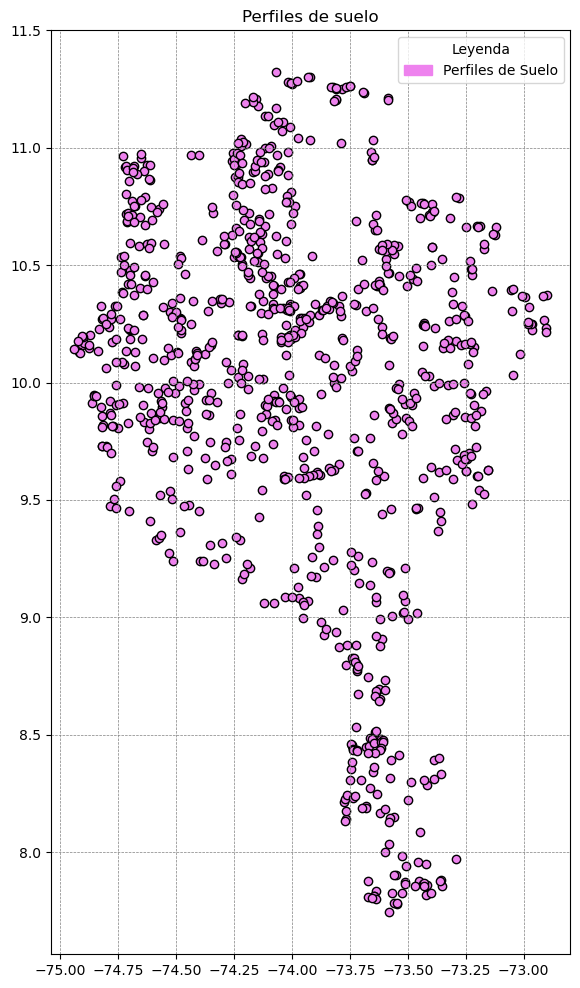

In [ ]:
## Posteriormente a un analisis que hace parte del mapeo de suelo, se obtiene la base inicial con las primeras covariables
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Leer el archivo shapefile
shapefile_path = "d:\\DATOX\\Agrarias\\Pedo\\datos finales.shp"  
gdf = gpd.read_file(shapefile_path)

# Mostrar la información básica del shapefile
print(gdf.info())

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 12))

# Dibujar el shapefile en el mapa
gdf.plot(ax=ax, color='violet', edgecolor='black')

# Añadir título
ax.set_title('Perfiles de suelo')

# Añadir cuadrícula
ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

# Crear leyenda 
legend = mpatches.Patch(color='violet', label='Perfiles de Suelo')

# Añadir la leyenda al gráfico
ax.legend(handles=[legend], loc='upper right', title="Leyenda")

# Mostrar el mapa
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<ipython-input-12-5e323fb5dc6f>:7: SyntaxWarning: invalid escape sequence '\D'
  shapefile_path = "d:\DATOX\Agrarias\Pedo\Preci.shp"  # Sustituye con la ruta de tu shapefile


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   48015050    105 non-null    float64 
 1   SP          116 non-null    object  
 2   Aeropuerto  116 non-null    object  
 3   Leticia     105 non-null    object  
 4   Amazonas    105 non-null    object  
 5   CODIGO      1443 non-null   object  
 6   CATEGORIA   1454 non-null   object  
 7   ESTACI�N    1454 non-null   object  
 8   MUNICIPIO   1443 non-null   object  
 9   DEPARTAMEN  1443 non-null   object  
 10  AO          1443 non-null   float64 
 11  ALTITUD (m  1443 non-null   float64 
 12  LONGITUD    1443 non-null   float64 
 13  LATITUD     1443 non-null   float64 
 14  ENE         1443 non-null   float64 
 15  FEB         1443 non-null   float64 
 16  MAR         1443 non-null   float64 
 17  ABR         1443 non-null   float64 
 18  MAY         1443 non-null   float64 
 19

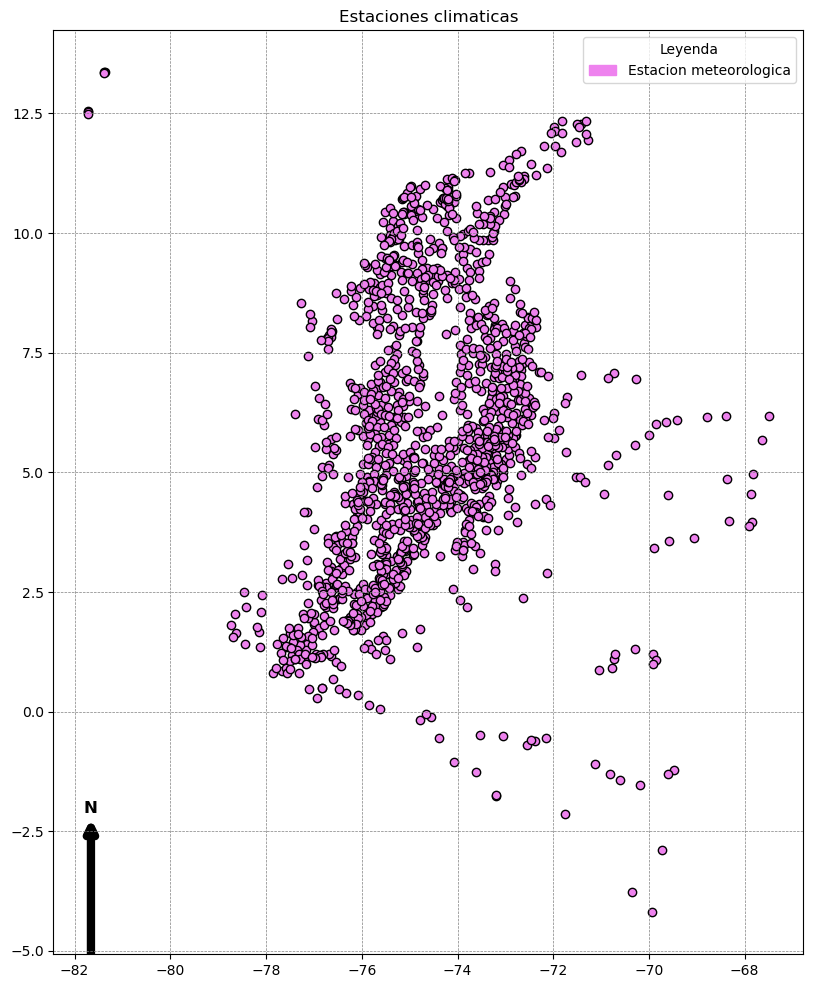

In [ ]:
## Para identificar otras covariables se tienen datos de precipitacion 
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Leer el archivo shapefile
shapefile_path = "d:\DATOX\Agrarias\Pedo\Preci.shp"  # Sustituye con la ruta de tu shapefile
gdf = gpd.read_file(shapefile_path)

# Mostrar la información básica del shapefile
print(gdf.info())

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 12))

# Dibujar el shapefile en el mapa
gdf.plot(ax=ax, color='violet', edgecolor='black')

# Añadir título
ax.set_title('Estaciones climaticas')

# Añadir cuadrícula
ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

# Crear leyenda (suponiendo que no tienes una columna categórica, pero puedes crearla manualmente si lo deseas)
legend = mpatches.Patch(color='violet', label='Estacion meteorologica')

# Añadir la leyenda al gráfico
ax.legend(handles=[legend], loc='upper right', title="Leyenda")
# Añadir flecha de norte en la esquina inferior derecha
# Las coordenadas del extremo de la flecha se ajustan a la zona del mapa
north_arrow = mpatches.FancyArrowPatch((0.05, -3.4), (0.05, 0.15), mutation_scale=15, color='black', arrowstyle='->', linewidth=6, transform=ax.transAxes)
ax.add_patch(north_arrow)

# Añadir texto de 'N' para indicar el norte
ax.text(0.05, 0.15, 'N', ha='center', va='bottom', transform=ax.transAxes, fontsize=12, fontweight='bold')

# Mostrar el mapa
plt.show()

In [ ]:
## Mediante corte se identifican las estaciones para los departamentos del Cesar y el Magdalena
import geopandas as gpd

# Cargar datos
points_gdf = gpd.read_file(r"d:\DATOX\Agrarias\Pedo\Preci.shp")
polygons_gdf = gpd.read_file(r"d:\DATOX\Agrarias\Pedo\MAG_CES.shp")

# mismo sistema de referencia
points_gdf = points_gdf.to_crs(polygons_gdf.crs)

# Intersección de puntos y polígonos
points_in_polygons = gpd.sjoin(points_gdf, polygons_gdf, how="inner", predicate="within")

# Guardar el resultado 
points_in_polygons.columns = [col[:10] for col in points_in_polygons.columns]
points_in_polygons.to_file(r"d:\DATOX\Agrarias\Pedo\Cortado_estaciones.shp", driver="ESRI Shapefile")

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<ipython-input-14-a6f512b4872b>:7: SyntaxWarning: invalid escape sequence '\D'
  shapefile_path = "d:\DATOX\Agrarias\Pedo\Puntos_cortados_.shp"  #


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   48015050    0 non-null      float64 
 1   SP          0 non-null      object  
 2   Aeropuerto  0 non-null      object  
 3   Leticia     0 non-null      object  
 4   Amazonas    0 non-null      object  
 5   CODIGO      108 non-null    object  
 6   CATEGORIA   108 non-null    object  
 7   ESTACI�N    108 non-null    object  
 8   MUNICIPIO   108 non-null    object  
 9   DEPARTAMEN  108 non-null    object  
 10  AO          108 non-null    int64   
 11  ALTITUD (m  108 non-null    int64   
 12  LONGITUD    108 non-null    float64 
 13  LATITUD     108 non-null    float64 
 14  ENE         108 non-null    float64 
 15  FEB         108 non-null    float64 
 16  MAR         108 non-null    float64 
 17  ABR         108 non-null    float64 
 18  MAY         108 non-null    float64 
 19  

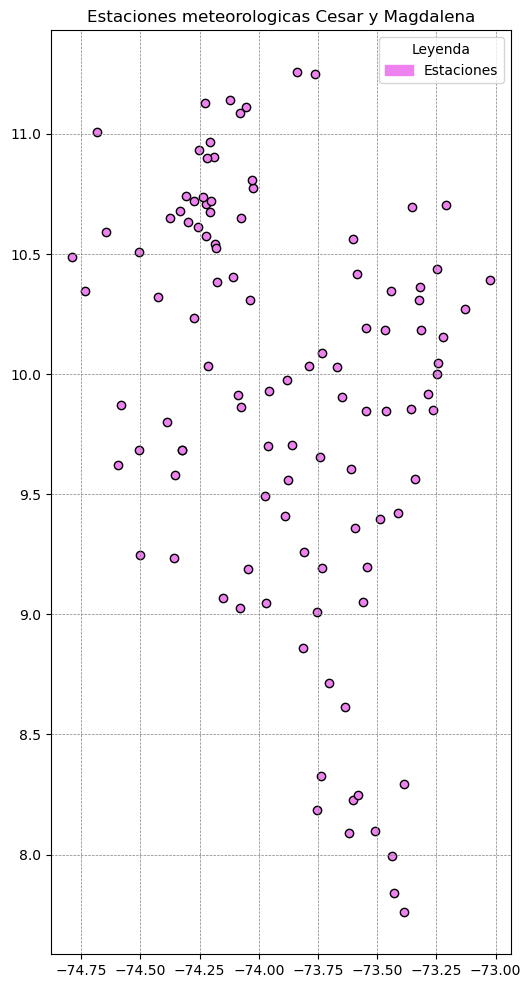

In [ ]:
## Esta Parte permite identificar ejercicios de visualizacion de los datos vector con atributos 
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Leer el archivo shapefile
shapefile_path = "d:\DATOX\Agrarias\Pedo\Puntos_cortados_.shp"  # 
gdf = gpd.read_file(shapefile_path)

# Mostrar la información básica del shapefile
print(gdf.info())

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 12))

# Dibujar el shapefile en el mapa
gdf.plot(ax=ax, color='violet', edgecolor='black')

# Añadir título
ax.set_title('Estaciones meteorologicas Cesar y Magdalena')

# Añadir cuadrícula
ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

# Crear leyenda 
legend = mpatches.Patch(color='violet', label='Estaciones')

# Añadir la leyenda al gráfico
ax.legend(handles=[legend], loc='upper right', title="Leyenda")

# Mostrar el mapa
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
<ipython-input-15-a8416d1f0de6>:7: SyntaxWarning: invalid escape sequence '\A'
  dem_path = "g:\Agrarias_MAestria\Pedometria\ZOnaz_cesar_magdalena.tif"


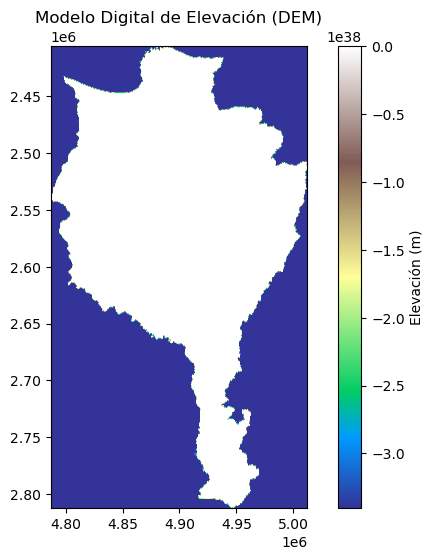

In [ ]:
## Operaciones con datos raster -DEM
## se tiene un DEM de 30 metros para los departamentos del Cesar y el Magdalena
import rasterio
import matplotlib.pyplot as plt

# Leer el archivo DEM
dem_path = "g:\Agrarias_MAestria\Pedometria\ZOnaz_cesar_magdalena.tif"  
with rasterio.open(dem_path) as src:
    dem_data = src.read(1)  # Leer la primera banda del DEM
    transform = src.transform  # Obtener la transformación
    crs = src.crs  # Sistema de referencia de coordenadas

# Mostrar la imagen del DEM
plt.figure(figsize=(8, 6))
# Para multiplicar correctamente el 'Affine' y obtener los límites del DEM
xmin, ymin = transform * (0, 0)
xmax, ymax = transform * (dem_data.shape[1], dem_data.shape[0])

plt.imshow(dem_data, cmap='terrain', extent=(xmin, xmax, ymin, ymax))
plt.colorbar(label='Elevación (m)')
plt.title('Modelo Digital de Elevación (DEM)')

# Mostrar el mapa
plt.show()

El DEM ha sido transformado y guardado en: d:\DATOX\Agrarias\Pedo\DEM_transformado.tif


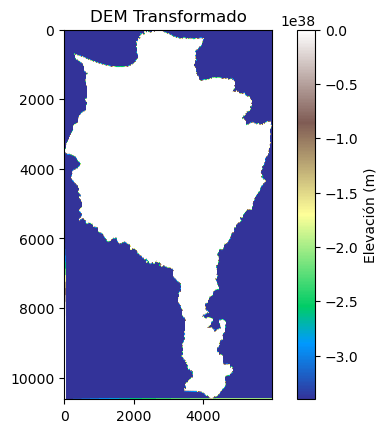

In [ ]:
# Ejercicio de transformacion de sistema de referencia de DEM segun datos vector
import rasterio
import geopandas as gpd
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo DEM
dem_path =  (r"g:\Agrarias_MAestria\Pedometria\ZOnaz_cesar_magdalena.tif")
with rasterio.open(dem_path) as src:
    dem_data = src.read(1)  # Leer la primera banda del DEM
    dem_crs = src.crs  # Sistema de referencia de coordenadas del DEM
    dem_transform = src.transform  # Transformación SRC del DEM

# Leer la capa vectorial 
vector_shapefile =(r"d:\DATOX\Agrarias\Pedo\Puntos_cortados_.shp")
gdf = gpd.read_file(vector_shapefile)
target_crs = gdf.crs  # CRS de la capa vectorial

# Si el CRS del DEM es diferente al CRS de la capa vectorial, se realiza la transformación
if dem_crs != target_crs:
    # Calcular la transformación para reproyectar el DEM al CRS del vector 
    transform, width, height = calculate_default_transform(dem_crs, target_crs, dem_data.shape[1], dem_data.shape[0], *src.bounds)
    
    # Crear un nuevo archivo DEM transformado
    transformed_dem_path = (r"d:\DATOX\Agrarias\Pedo\DEM_transformado.tif")
    
    # Reproyectar el DEM
    with rasterio.open(transformed_dem_path, 'w', driver='GTiff', count=1, dtype=dem_data.dtype,
                       crs=target_crs, transform=transform, width=width, height=height) as dst:
        reproject(
            source=dem_data,
            destination=rasterio.band(dst, 1),
            src_transform=dem_transform,
            src_crs=dem_crs,
            dst_transform=transform,
            dst_crs=target_crs,
            resampling=Resampling.nearest)
    
    print(f"El DEM ha sido transformado y guardado en: {transformed_dem_path}")
else:
    print("El CRS ya es el mismo, no se requiere transformación.")

# Visualizar el DEM transformado
with rasterio.open(transformed_dem_path) as src:
    dem_data_transformed = src.read(1)
    plt.imshow(dem_data_transformed, cmap='terrain')
    plt.colorbar(label="Elevación (m)")
    plt.title('DEM Transformado')
    plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
<ipython-input-17-2088dae981b7>:8: SyntaxWarning: invalid escape sequence '\A'
  dem_path = "g:\Agrarias_MAestria\Pedometria\ZOnaz_cesar_magdalena.tif"  # Ruta del archivo DEM


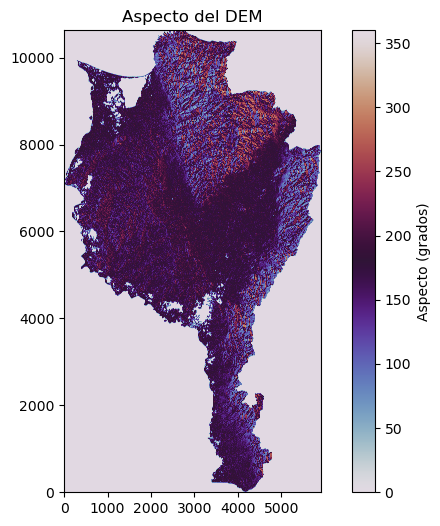

In [ ]:
## ejercicio calculando angulo de pendiente o aspecto del DEM
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Leer el DEM
dem_path = "g:\Agrarias_MAestria\Pedometria\ZOnaz_cesar_magdalena.tif"  # Ruta del archivo DEM
with rasterio.open(dem_path) as src:
    dem_data = src.read(1)  # Leer la primera banda del DEM
    transform = src.transform  # Obtener la transformación afín

# Calcular las pendientes en x y y
dx, dy = np.gradient(dem_data, transform[0], transform[4])  # Usar las resoluciones espaciales

# Calcular el aspecto (en grados)
aspect = np.arctan2(-dy, dx)  # Aspecto en radianes
aspect = np.degrees(aspect)  # Convertir de radianes a grados
aspect = np.where(aspect < 0, aspect + 360, aspect)  # Asegurarse de que los valores estén entre 0 y 360

# Mostrar el resultado del aspecto
plt.figure(figsize=(8, 6))
plt.imshow(aspect, cmap='twilight', extent=(0, dem_data.shape[1], 0, dem_data.shape[0]))
plt.colorbar(label='Aspecto (grados)')
plt.title('Aspecto del DEM')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
<ipython-input-18-544e42e34afc>:7: SyntaxWarning: invalid escape sequence '\A'
  dem_path = "g:\Agrarias_MAestria\Pedometria\ZOnaz_cesar_magdalena.tif"  # Ruta del archivo DEM


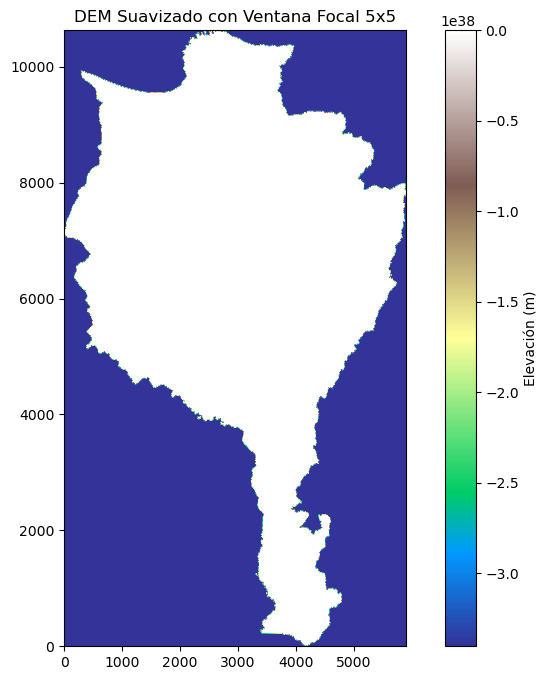

In [ ]:
## Ejercicio aplicando ventana foca de 5*5
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
# Leer el DEM
dem_path = "g:\Agrarias_MAestria\Pedometria\ZOnaz_cesar_magdalena.tif"  # Ruta del archivo DEM
with rasterio.open(dem_path) as src:
    dem_data = src.read(1)  # Leer la primera banda del DEM
    transform = src.transform  # Obtener la transformación afín

# Crear una ventana de 5x5 (esto es un filtro de promedio)
kernel = np.ones((5, 5), dtype=np.float32) / 25  # Ventana de promedio

# Aplicar la convolución al DEM para suavizar
smoothed_dem = convolve(dem_data, kernel, mode='nearest')

# Mostrar el DEM suavizado
plt.figure(figsize=(10, 8))
plt.imshow(smoothed_dem, cmap='terrain', extent=(0, dem_data.shape[1], 0, dem_data.shape[0]))
plt.colorbar(label='Elevación (m)')
plt.title('DEM Suavizado con Ventana Focal 5x5')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
<ipython-input-19-6da1606d89be>:8: SyntaxWarning: invalid escape sequence '\A'
  dem_path = "g:\Agrarias_MAestria\Pedometria\ZOnaz_cesar_magdalena.tif" # Ruta del archivo DEM


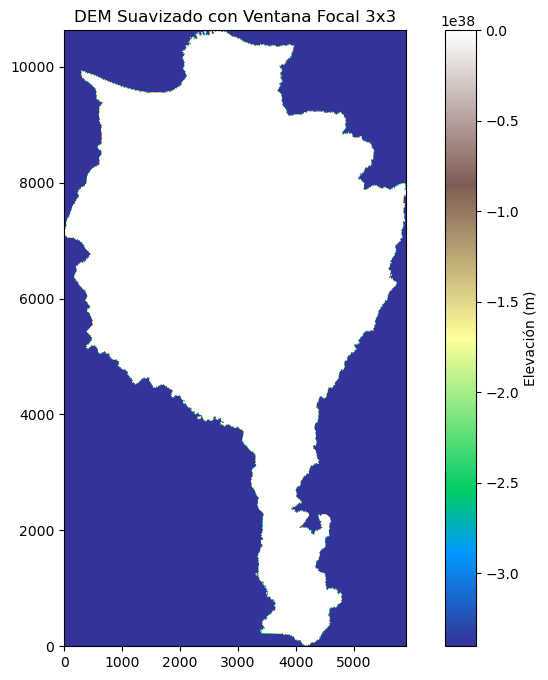

In [ ]:
## Ejercicio aplicando ventana foca de 3*3
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Leer el DEM
dem_path = "g:\Agrarias_MAestria\Pedometria\ZOnaz_cesar_magdalena.tif" # Ruta del archivo DEM
with rasterio.open(dem_path) as src:
    dem_data = src.read(1)  # Leer la primera banda del DEM
    transform = src.transform  # Obtener la transformación 

# Crear una ventana de 3x3 (esto es un filtro de promedio)
kernel = np.ones((3, 3), dtype=np.float32) / 9  # Ventana de promedio

# Aplicar la convolución al DEM para suavizar
smoothed_dem = convolve(dem_data, kernel, mode='nearest')

# Mostrar el DEM suavizado
plt.figure(figsize=(10, 8))
plt.imshow(smoothed_dem, cmap='terrain', extent=(0, dem_data.shape[1], 0, dem_data.shape[0]))
plt.colorbar(label='Elevación (m)')
plt.title('DEM Suavizado con Ventana Focal 3x3')
plt.show()

In [ ]:
# Preguntas 
# ¿Qué son las capas incongruentes y en qué se diferencian de las capas congruentes en el análisis espacial?

#Capas congruentes: Son capas que comparten el mismo Sistema de Referencia de Coordenadas (CRS), resolución espacial, y cobertura. Es decir, las geometrías de los objetos en las capas coinciden y están alineadas, lo que facilita su integración y análisis conjunto. Esto es esencial cuando se combinan capas de diferentes fuentes para realizar un análisis, ya que las relaciones espaciales entre las entidades (por ejemplo, puntos, líneas y polígonos) son claras y precisas.

 #Son aquellas que no coinciden en uno o más aspectos esenciales, como CRS, resolución espacial, cobertura o la escala de las entidades. Por ejemplo, una capa de puntos puede estar en un CRS diferente a una capa de polígonos, o las capas pueden tener diferentes resoluciones espaciales (una capa raster de baja resolución y otra vectorial de alta resolución). Esta incongruencia puede dificultar la integración y el análisis preciso entre las capas, generando problemas como distorsión de las relaciones espaciales, mala superposición o imprecisión en los resultados.

##¿Por qué es importante abordar la incongruencia al agregar datos espaciales?


# Si las capas no están alineadas espacialmente o no comparten el mismo CRS, los resultados del análisis espacial pueden ser inexactos. Por ejemplo, si se está analizando la relación entre puntos y polígonos (como la proximidad de ciertos puntos a áreas protegidas), las incongruencias pueden llevar a resultados erróneos.

#Si los datos no están congruentes, los procedimientos de análisis que requieren la combinación de información de diferentes capas pueden fallar o producir errores. Por ejemplo, al realizar una intersección entre dos capas, una capa mal alineada puede generar un resultado incorrecto o vacío.

#Comparabilidad de los resultados: Las incongruencias pueden hacer que los resultados de diferentes capas no sean comparables, dificultando la interpretación y la toma de decisiones informadas.

##¿Cómo ayuda la interpolación ponderada por área a resolver problemas causados por la incongruencia entre capas?
#La interpolación ponderada por área es una técnica que asigna valores a las celdas o áreas de un raster o polígono en función del área que cada entidad de la capa tiene en común con las entidades de una capa de referencia.

#Cuando hay incongruencia entre capas, como diferencias en resolución espacial, la interpolación ponderada por área ayuda a:

#Homogeneizar la resolución: Si se tienen dos capas con diferentes resoluciones (por ejemplo, un DEM de baja resolución y una capa vectorial de alta resolución), la interpolación ponderada por área permite convertir los valores de la capa de baja resolución en una capa que tenga una resolución espacial más alta sin perder la información significativa.

#Mejorar la precisión: Al usar los valores de área para ponderar la interpolación, los valores de una capa se distribuyen de manera más coherente entre las celdas o elementos de la otra capa, lo que mejora la exactitud y reduce el impacto de las incongruencias.

#Optimizar la superposición de capas: Cuando las capas no coinciden perfectamente en términos de geometría, la interpolación ponderada por área permite distribuir los valores de manera proporcional, minimizando los efectos negativos de las diferencias en las geometrías.

##¿Cuáles son las limitaciones del uso de la interpolación ponderada por área con capas incongruentes?
#Aunque la interpolación ponderada por área puede ayudar a mitigar los efectos de la incongruencia entre capas, presenta algunas limitaciones:

#Pérdida de detalle: Al realizar la interpolación, especialmente en capas con alta resolución espacial, es posible que se pierda detalle en los valores, especialmente si hay grandes diferencias en la escala o resolución de las capas. Las capas de baja resolución pueden suavizar o perder características locales importantes.

#Errores por diferencia en geometrías: Si las geometrías de las capas son muy diferentes o no se alinean adecuadamente (por ejemplo, si una capa de polígonos tiene geometrías muy complejas y la otra tiene geometrías más simples), la interpolación ponderada por área podría generar resultados imprecisos.

#Requiere que las capas estén en un CRS común: Aunque la interpolación ponderada por área puede abordar algunos problemas de resolución espacial, no resuelve los problemas causados por capas que están en sistemas de refere

##¿Qué desafíos podrían surgir al calcular estadísticas zonales para polígonos irregulares o muy pequeños? 

#Por ejemplo, Errores en la asignación de valores de ráster a polígonos
#Descripción: En un análisis de estadísticas zonales, cada polígono se asigna un valor basado en las celdas ráster que lo intersectan. Para polígonos pequeños o irregulares, puede ser difícil determinar qué valores deben ser asignados, especialmente si las celdas ráster se superponen parcialmente en los bordes del polígono.
#Desafío: La asignación incorrecta de valores ráster a los polígonos pequeños o irregulares puede distorsionar las estadísticas zonales calculadas, especialmente si las celdas contienen valores muy diferentes.

# ¿Cómo afecta el tamaño de la ventana focal (por ejemplo, 3x3 vs 5x5) los resultados?

#El tamaño de la ventana focal en los análisis espaciales tiene un impacto significativo en los resultados, ya que afecta la cantidad de datos considerados en cada cálculo, así como la manera en que se suavizan o destacan las características de los datos. Cuando se aplica una ventana focal (como 3x3, 5x5, etc.) a un conjunto de datos, se toma una "ventana" del ráster que considera una cantidad específica de celdas en un área local y realiza un cálculo en esa ventana, que puede ser una media, mediana, suma, etc.

#Ventana pequeña (3x3):
#Un tamaño de ventana pequeño tiende a capturar detalles más finos, ya que considera solo una pequeña área alrededor de cada celda. Esto puede ser útil cuando se quiere preservar detalles y variaciones locales en los datos.